In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

In [13]:
file_names = []
for root, dirs, files in os.walk('../tb_files/Albert/MC-V2-ALL/for-chart'):
    for fname in files:
        full_fname = os.path.join(root, fname)
        file_names.append({'loc':full_fname, 'type':fname})

In [14]:
file_names[0]['type']

'310k_all'

In [15]:
#event_path = 'tb_files/MC-V1-2018/steps-090k/events.out.tfevents.1573531925.5cae4c63838d'

In [16]:
datas = []
step, loss, eval_acc = None, None, None
for file_name in file_names:
    for event in tf.train.summary_iterator(file_name['loc']):
        for value in event.summary.value:
            if value.tag == 'eval_acc':
                if value.HasField('simple_value'):
                    step = event.step
                    eval_acc = value.simple_value
            if value.tag == 'loss':
                if value.HasField('simple_value'):
                    loss = value.simple_value
            
            if step != None and loss != None and eval_acc != None:
                datas.append({'type':file_name['type'], 'step':step, 'loss':loss, 'eval_acc':eval_acc})
                step, loss, eval_acc = None, None, None

In [17]:
len(datas)

114

In [18]:
df = pd.DataFrame(datas)

In [19]:
df.head()

,type,step,loss,eval_acc
0,310k_all,1000,2.736186,0.2062
1,310k_all,2000,2.262812,0.5142
2,310k_all,3000,1.686098,0.5592
3,310k_all,4000,1.487648,0.5760
4,310k_all,5000,1.441640,0.5736


In [20]:
df2 = df.loc[(df['step'] >= 5000)]

In [21]:
len(df2)

102

In [22]:
df.groupby('type')['eval_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
310k_all,38.0,0.591868,0.067259,0.2062,0.596650,0.6093,0.61405,0.6181
380k_all,38.0,0.594208,0.067170,0.2083,0.598725,0.6107,0.61690,0.6204
440k_all,38.0,0.593276,0.068422,0.1978,0.597700,0.6102,0.61535,0.6176


Text(0, 0.5, 'eval_acc')

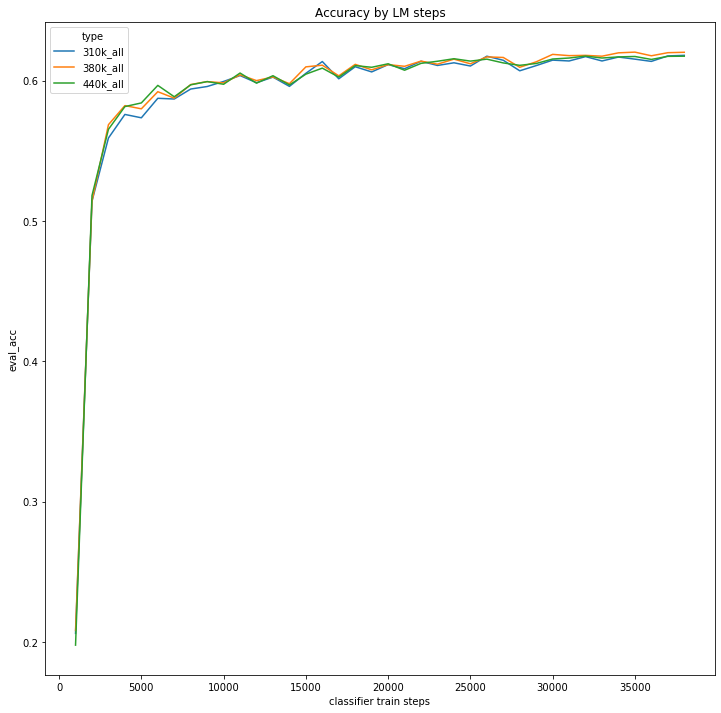

In [23]:
plt.figure(figsize=(12,12))
ax = sns.lineplot(x='step', y='eval_acc', data=df, hue='type')
ax.set_title('Accuracy by LM steps')
plt.xlabel('classifier train steps')
plt.ylabel('eval_acc')

Text(0, 0.5, 'eval_acc')

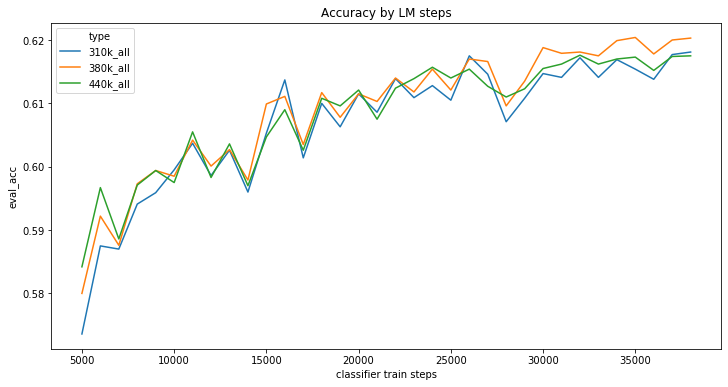

In [24]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='step', y='eval_acc', data=df2, hue='type')
ax.set_title('Accuracy by LM steps')
plt.xlabel('classifier train steps')
plt.ylabel('eval_acc')

Text(0, 0.5, 'density')

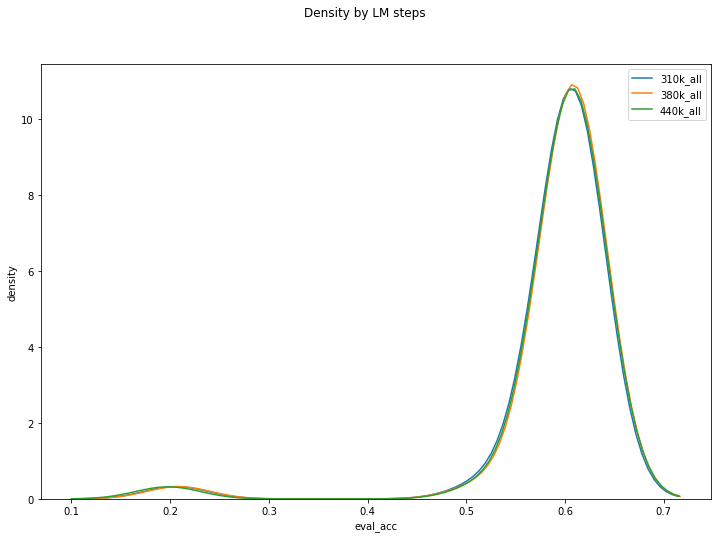

In [25]:
plt.figure(figsize=(12,8))
df.groupby('type')['eval_acc'].apply(lambda x: sns.kdeplot(data=x, legend=True))
plt.suptitle('Density by LM steps')
plt.xlabel('eval_acc')
plt.ylabel('density')

Text(0, 0.5, 'density')

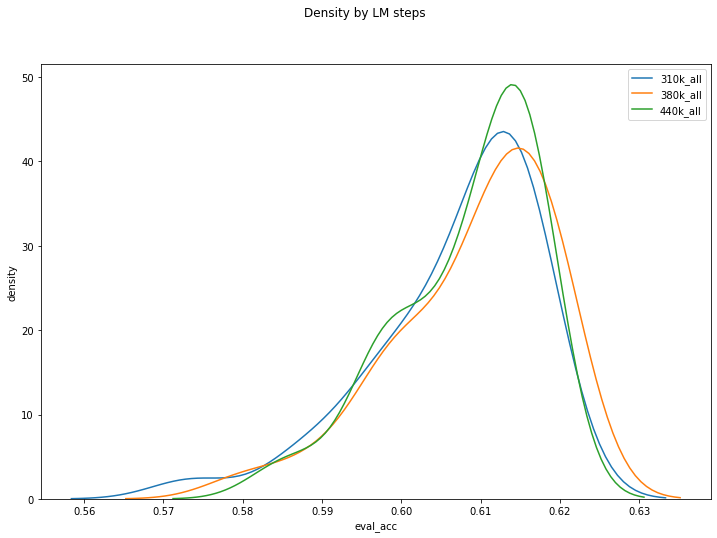

In [26]:
plt.figure(figsize=(12,8))
df2.groupby('type')['eval_acc'].apply(lambda x: sns.kdeplot(data=x, legend=True))
plt.suptitle('Density by LM steps')
plt.xlabel('eval_acc')
plt.ylabel('density')

Text(0.5, 1.0, 'Box-plot by LM steps')

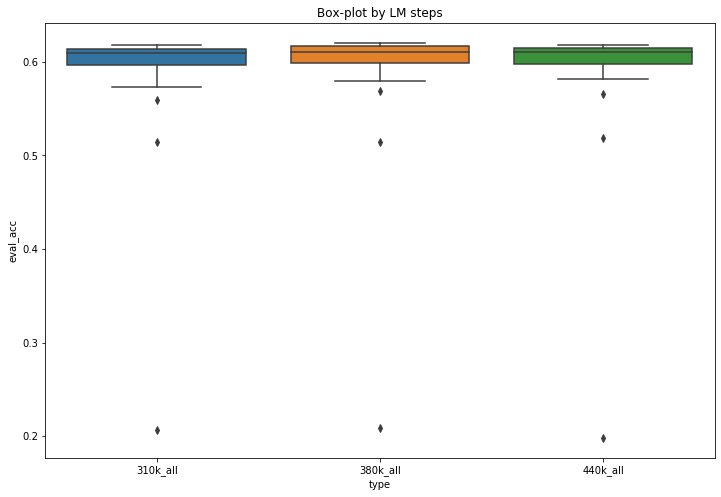

In [27]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='type', y='eval_acc', data=df)
ax.set_title('Box-plot by LM steps')